In [1]:
from train import *

"experiment"
patch_size = 256
#learn_rate = 1e-4
batch_size = 8

l1_factor = 1200.0

Using TensorFlow backend.


In [2]:
epochs =  60000

In [3]:
def get_model():
    type_ = "lsgan"
    learn_rate = 1e-4
    opt = "rms"
    vgg = False
    inside = False    
    save_name = "{}_{}_{}_{:.1e}_end".format(type_,opt,int(vgg),learn_rate)
    
    ####### create model
    new_model = False 
    load_weights = False

    train_vgg = vgg
    load_vgg = vgg
    load_name = save_name

    model = CiGAN(save_name, load_name, patch_size, epochs,batch_size, 
              new_model, train_vgg=train_vgg, load_vgg=load_vgg,
              load_weights=load_weights,l1_factor = l1_factor, type = type_,
              save_model = False,inside = inside,learn_rate=learn_rate)
    model.build_model(batch_normalization=True)
    return model
   

In [4]:
def results(model, exp, id_ = 0):
    if exp == "val":  
        model.validate_model()
    elif exp == "syn":
        #2 its not cancer
        model.synthesis(id_)
    elif exp == "convert":
        print("Synthesize_dataset {} images".format(int(id_*8)))
        model.synthesize_dataset(id_)
    

In [5]:
model = get_model()

Building generator
batch normalization
(?, 4, 4, 128)
batch normalization
(?, 8, 8, 128)
batch normalization
(?, 16, 16, 64)
batch normalization
(?, 32, 32, 64)
batch normalization
(?, 64, 64, 32)
batch normalization
(?, 128, 128, 32)
batch normalization
(?, 256, 256, 32)
(?, 256, 256, 32) g_lastconv_256
Building discriminator
(?, 256, 256, 32)
(?, 256, 256, 64)
(?, 128, 128, 128)
(?, 64, 64, 256)
(?, 32, 32, 512)
Building discriminator
(?, 256, 256, 32)
(?, 256, 256, 64)
(?, 128, 128, 128)
(?, 64, 64, 256)
(?, 32, 32, 512)
VGG just inside
Losses lsgan have been configured
Solver lsgan has been configured


In [1]:
import numpy as np
import matplotlib.pyplot as plt


### Image validation

In [7]:
results(model,"val")

INFO:tensorflow:Restoring parameters from ./models/lsgan_rms_0_1.0e-04_end
INFO:tensorflow:Restoring parameters from ./models/lsgan_rms_0_1.0e-04_end
Validating 1
g 8
Patches size (8, 256, 256, 4)
[0.01189314 0.03730016 0.04045267 ... 0.860231   0.8631068  0.8715395 ]


In [8]:
path = "validation/lsgan_rms_0_1.0e-04_end/lsgan_rms_0_1.0e-04_end_256_1.png"

In [9]:
def plot_image(path,title):
    im = plt.imread(path)
    fig = plt.figure(figsize = (15,10))
    plt.imshow(im,cmap = plt.cm.gray)
    plt.title(title, fontsize = 18)
    labels = ["Input","Mask","Output"]
    for i,j in enumerate(labels):
        plt.text(100+(i*200) , 210, r'$\bf{}$'.format(j),
             {'color': 'black', 'fontsize': 16, 'ha': 'center', 'va': 'center',
              'bbox': dict(boxstyle="round", fc="white", ec="black", pad=0.2)})  
    plt.xticks([])
    plt.yticks([])
    plt.show()

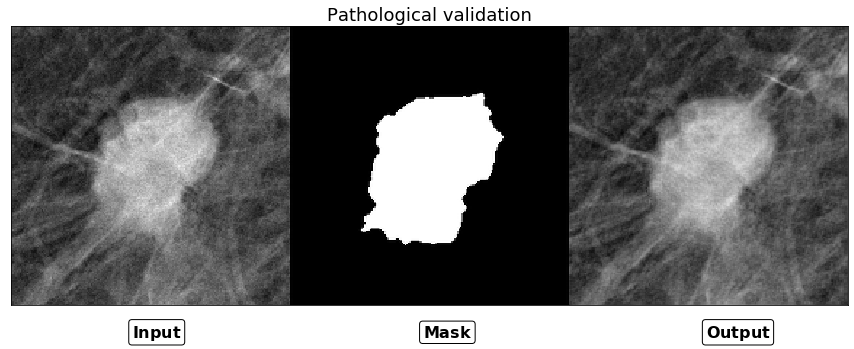

In [10]:
plot_image(path,'Pathological validation')

# synthesis

In [11]:
results(model,"syn",1)

INFO:tensorflow:Restoring parameters from ./models/lsgan_rms_0_1.0e-04_end
INFO:tensorflow:Restoring parameters from ./models/lsgan_rms_0_1.0e-04_end
1
Patches_nc_ size (1, 256, 256, 4)
[0.07688542 0.08451545 0.08465369 ... 0.9434601  0.94400495 0.94670624]


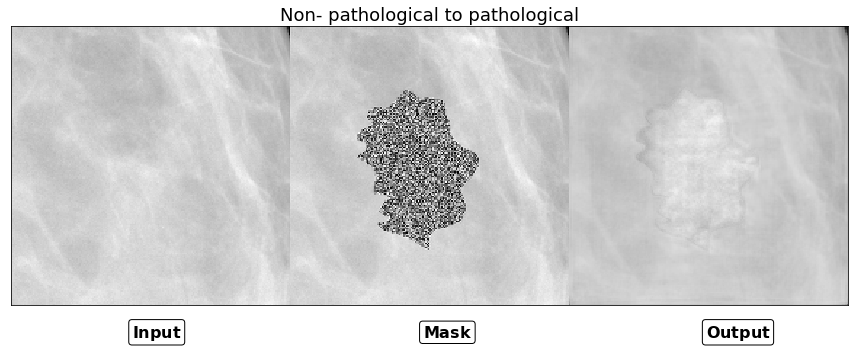

In [12]:
path = "synthesis/lsgan_rms_0_1.0e-04_end/lsgan_rms_0_1.0e-04_end_256_1.png"
plot_image(path,'Non- pathological to pathological')

INFO:tensorflow:Restoring parameters from ./models/lsgan_rms_0_1.0e-04_end
INFO:tensorflow:Restoring parameters from ./models/lsgan_rms_0_1.0e-04_end
1
Patches_nc_ size (1, 256, 256, 4)
[0.04326724 0.04853174 0.05414703 ... 0.84530056 0.8671683  0.87169266]


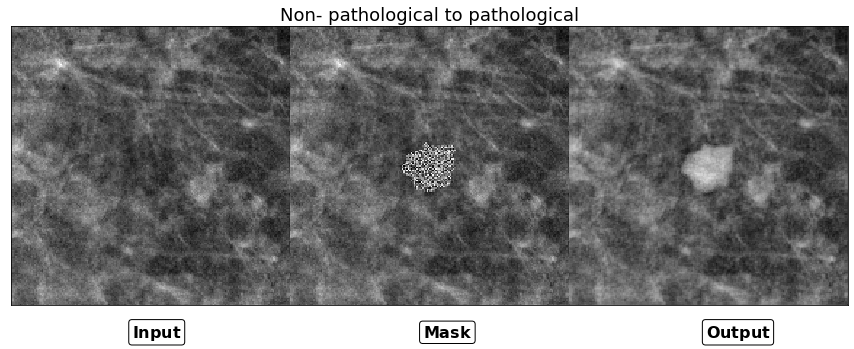

In [13]:
results(model,"syn",2)
path = "synthesis/lsgan_rms_0_1.0e-04_end/lsgan_rms_0_1.0e-04_end_256_2.png"
plot_image(path,'Non- pathological to pathological')

INFO:tensorflow:Restoring parameters from ./models/lsgan_rms_0_1.0e-04_end
INFO:tensorflow:Restoring parameters from ./models/lsgan_rms_0_1.0e-04_end
1
Patches_nc_ size (1, 256, 256, 4)
[0.02501676 0.03850389 0.0458888  ... 0.8404528  0.8408872  0.85452783]


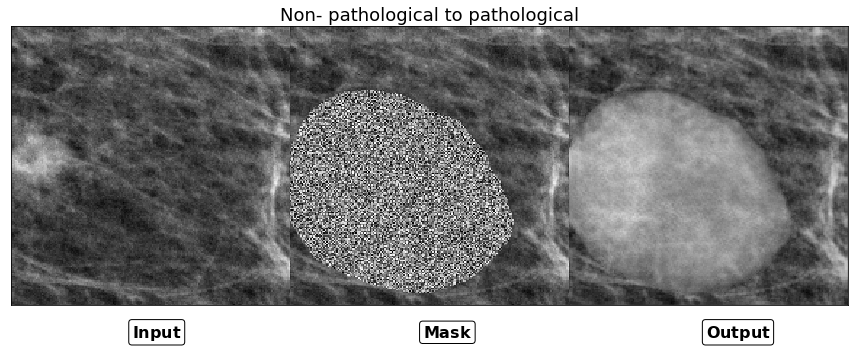

In [14]:
results(model,"syn",3)
path = "synthesis/lsgan_rms_0_1.0e-04_end/lsgan_rms_0_1.0e-04_end_256_3.png"
plot_image(path,'Non- pathological to pathological')

In [15]:
results(model,"convert",1)

Synthesize_dataset 8 images
INFO:tensorflow:Restoring parameters from ./models/lsgan_rms_0_1.0e-04_end
INFO:tensorflow:Restoring parameters from ./models/lsgan_rms_0_1.0e-04_end
Num  0
8
Patches_nc_ size (8, 256, 256, 4)
samples_generated


In [18]:
results(model,"convert",4)

Synthesize_dataset 32 images
INFO:tensorflow:Restoring parameters from ./models/lsgan_rms_0_1.0e-04_end
INFO:tensorflow:Restoring parameters from ./models/lsgan_rms_0_1.0e-04_end
Num  0
8
Patches_nc_ size (8, 256, 256, 4)
Num  1
Patches_nc_ size (8, 256, 256, 4)
Num  2
Patches_nc_ size (8, 256, 256, 4)
Num  3
Patches_nc_ size (8, 256, 256, 4)
samples_generated


In [2]:
import matplotlib.gridspec as gridspec

def plot_nc_patches(nc_patches):
    fig = plt.figure(figsize=(16, 8))
    total = nc_patches.shape[0]
    path =  "./validation/lsgan"
    # gridspec inside gridspec
    outer_grid = gridspec.GridSpec(total // 8, 8, wspace=0.0, hspace=0.0)

    for i in range(total):
        ax = fig.add_subplot(outer_grid[i])
        img = nc_patches[i,:,:,0]
        ax.imshow(img,cmap = plt.cm.gray)
        ax.set_xticks([])
        ax.set_yticks([])
        fig.add_subplot(ax)

    all_axes = fig.get_axes()

    # show only the outside spines
    for ax in all_axes:
        for sp in ax.spines.values():
            sp.set_visible(False)
        if ax.is_first_row():
            ax.spines['top'].set_visible(True)
        if ax.is_last_row():
            ax.spines['bottom'].set_visible(True)
        if ax.is_first_col():
            ax.spines['left'].set_visible(True)
        if ax.is_last_col():
            ax.spines['right'].set_visible(True)

    plt.show()

## final

(32, 256, 256, 1)


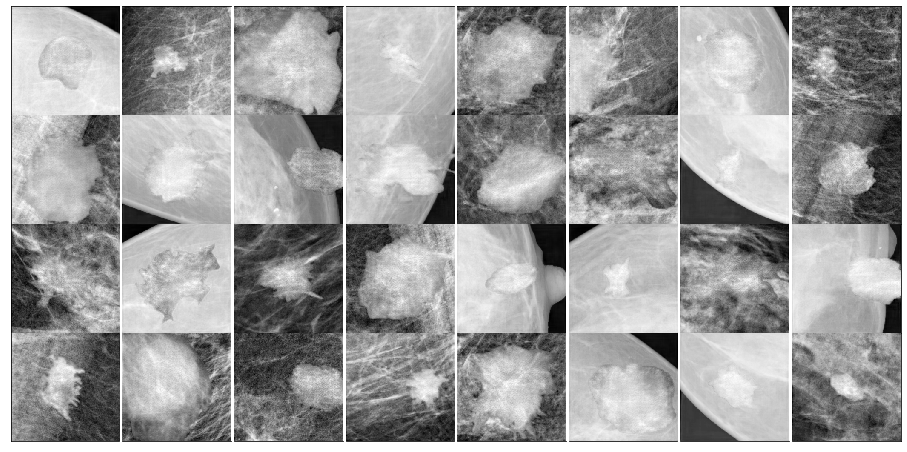

In [19]:
nc_patches = np.load('synthesis/samples_sinthesizes4.npz')['samples']
print(nc_patches.shape)
plot_nc_patches(nc_patches)

In [ ]:
#original

(32, 256, 256, 1)


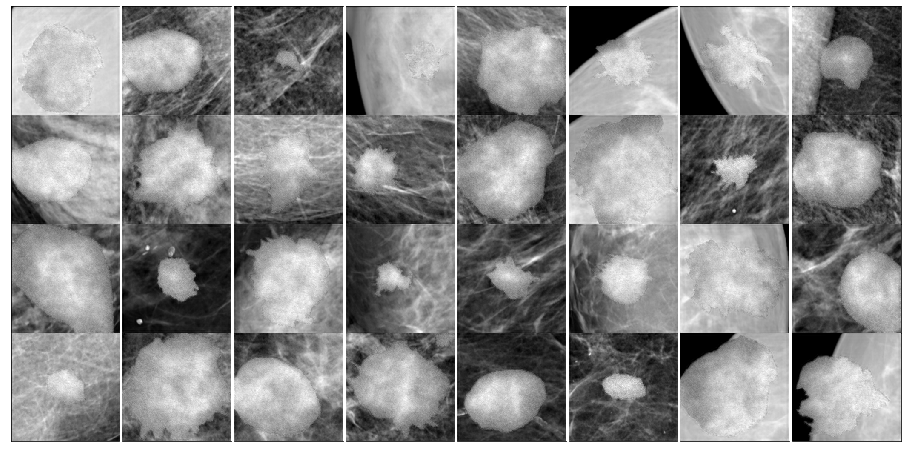

In [21]:
nc_patches = np.load('synthesis/samples_sinthesizes_org.npz')['samples']
print(nc_patches.shape)
plot_nc_patches(nc_patches)

(8, 256, 256, 1)


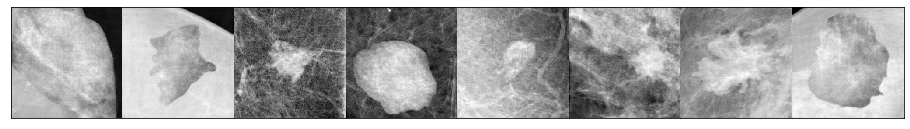

In [20]:
nc_patches = np.load('synthesis/samples_sinthesizes1.npz')['samples']
print(nc_patches.shape)
plot_nc_patches(nc_patches)

(40, 256, 256, 1)


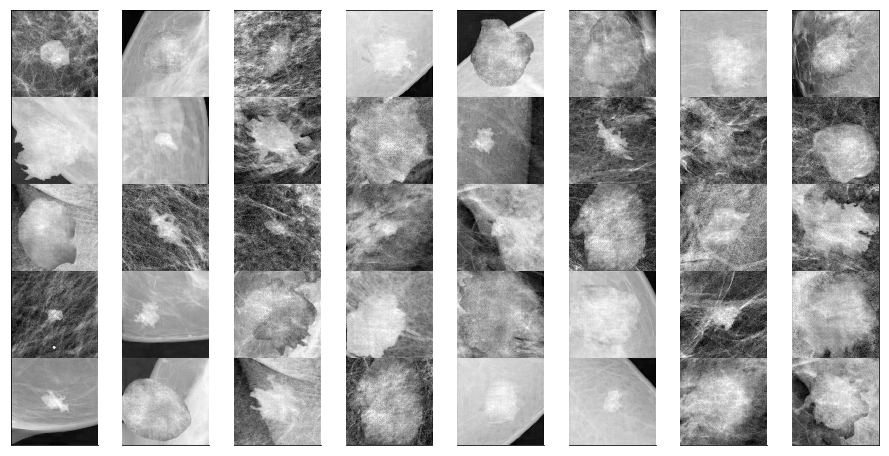

In [3]:
nc_patches = np.load('synthesis/samples_sinthesizes5.npz')['samples']
print(nc_patches.shape)
plot_nc_patches(nc_patches)

## org
